In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("reviews.csv") 

In [3]:
df.shape

(1000, 2)

In [4]:
df.sample(5)

,Description,Is_Response
536,"I stayed here for one night, because I had a j...",not happy
667,Just back from - days in Chicago. We found the...,happy
414,I enjoyed my stay. The staff were very friendl...,happy
602,First timers to the Big Apple! Ace Hotel is a ...,happy
122,Stayed here August -- - -- and we were pleased...,happy


In [5]:
# Remove all rows with null values
df.dropna(axis=0, inplace=True)

In [6]:
df.shape

(1000, 2)

In [7]:
# Change Is_Response to 0 for no happy and 1 for happy
df['Is_Response'].replace(['happy','not happy'],[1,0], inplace=True)

In [8]:
df.sample(5)

,Description,Is_Response
28,I have stayed here numerous times and never be...,1
660,We are traveling to Cocoa Beach and stopped he...,1
610,I really enjoyed my stay here. Aesthetically i...,1
480,"Staff was friendly - new to the city, I was gi...",1
753,Don't make the mistake and stay here unless yo...,0


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [9]:
X = df['Description']
y = df['Is_Response']

In [14]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
tfidf.fit(X)
features = tfidf.transform(X)

In [15]:
features.shape

(1000, 8212)

In [19]:
features.toarray()[:10,1000:1010]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.09434825, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [21]:
clf = LogisticRegression().fit(X_train,y_train)

In [22]:
### Train accuracy
clf.score(X_train,y_train)

0.8925

In [23]:
y_pred = clf.predict(X_test)
print("Accuracy Score:",clf.score(X_test,y_test))  

Accuracy Score: 0.79


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 28  42]
 [  0 130]]


In [25]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        70
           1       0.76      1.00      0.86       130

    accuracy                           0.79       200
   macro avg       0.88      0.70      0.72       200
weighted avg       0.84      0.79      0.76       200



Text(0.5, 15.0, 'Predicted')

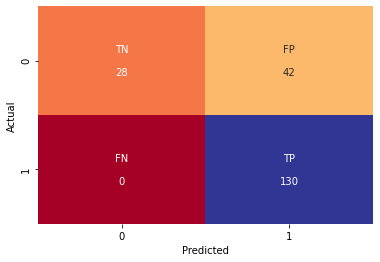

In [26]:
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")

### Predict for new data

In [50]:
# tfidf.vocabulary_

In [44]:
# Predict whether the given review is positive or negative 
docs = ["This is very good",
        "Bad room service. Bad worst ugly. No No No Never Again",
        "Food was awesome"]
# Tfidf
features = tfidf.transform(docs)
print(features.shape)
print(clf.predict(features))

(3, 8212)
[1 0 1]


## Text classification using BernoulliNB

In [70]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
features = tfidf.fit_transform(X).toarray()

In [79]:
#tfidf.vocabulary_.items()

In [71]:
features.shape

(1000, 62505)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [73]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(X_train,y_train)

In [74]:
bnb.score(X_train,y_train)

0.78875

In [75]:
y_pred = bnb.predict(X_test)
print("Accuracy Score:",bnb.score(X_test,y_test))  

Accuracy Score: 0.68


[[ 11  59]
 [  5 125]]


Text(0.5, 15.0, 'Predicted')

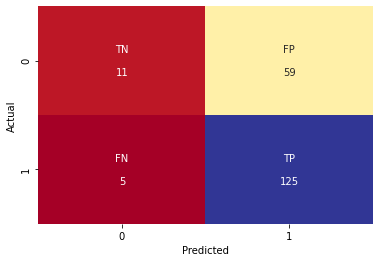

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")